# Design unique_probes in CTP14 as quality check of decoding

By Pu Zheng

2022.11.11


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

#from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
#from Bio.Blast.Applications import NcbiblastnCommandline
#from Bio.Blast import NCBIXML

17592


In [2]:
import pandas as pd
import re

<a id='0.2'></a>
## 0.2 Genome reference information

In [3]:
import ImageAnalysis3.library_tools.quality_check as check

In [4]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38'
genome_folder = os.path.join(reference_folder, 'Genome')

print(f"-- reference_folder: {reference_folder}")

# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")
    
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'human_sequential_validation')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

-- reference_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38
Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain
-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\reports


# Part 1. check the human genome library

In [5]:
genome_library_folder = os.path.join(pool_folder, f'human_genome_library')
if not os.path.exists(genome_library_folder):
    print(f"create library folder: {genome_library_folder}")
    os.makedirs(genome_library_folder)
else:
    print(f"Use genome_library_folder: {genome_library_folder}")

Use genome_library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library


In [6]:
genome_filtered_records = []
with open(os.path.join(genome_library_folder, 
                       'filtered_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        genome_filtered_records.append(record)
print(len(genome_filtered_records))

327063


In [7]:
# get region size dict
min_num_probes = 50
genome_filtered_size_dic, len_check = check._check_region_size(
    genome_filtered_records, min_size=min_num_probes)
print(len_check)

gene: 0 -> 339
gene: 1 -> 306
gene: 10 -> 216
gene: 100 -> 344
gene: 1000 -> 326
gene: 1001 -> 341
gene: 1002 -> 381
gene: 1003 -> 332
gene: 1004 -> 283
gene: 1005 -> 313
gene: 101 -> 282
gene: 102 -> 240
gene: 1020 -> 52
gene: 1023 -> 217
gene: 1024 -> 242
gene: 1025 -> 306
gene: 1029 -> 235
gene: 103 -> 205
gene: 1030 -> 209
gene: 1031 -> 290
gene: 1032 -> 275
gene: 1033 -> 234
gene: 1034 -> 183
gene: 1035 -> 201
gene: 1036 -> 130
gene: 1037 -> 237
gene: 1038 -> 227
gene: 1039 -> 246
gene: 104 -> 119
gene: 1040 -> 350
gene: 1041 -> 254
gene: 1042 -> 325
gene: 1043 -> 122
gene: 1044 -> 253
gene: 1045 -> 347
gene: 1046 -> 263
gene: 1047 -> 350
gene: 1048 -> 292
gene: 1049 -> 176
gene: 105 -> 352
gene: 1050 -> 267
gene: 1051 -> 384
gene: 1052 -> 135
gene: 1053 -> 351
gene: 1054 -> 320
gene: 1055 -> 268
gene: 1056 -> 361
gene: 1057 -> 155
gene: 1058 -> 131
gene: 1059 -> 164
gene: 106 -> 244
gene: 1060 -> 315
gene: 1061 -> 309
gene: 1062 -> 240
gene: 1063 -> 266
gene: 1064 -> 327
gene: 10

In [8]:
genome_blasted_records = []
with open(os.path.join(genome_library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        genome_blasted_records.append(record)
print(len(genome_blasted_records))

159879


In [9]:
# get region size dict
min_num_probes = 50
genome_blasted_size_dic, len_check = check._check_region_size(
    genome_blasted_records,min_size=min_num_probes)
print(len_check)

gene: 0 -> 120
gene: 1 -> 120
gene: 10 -> 120
gene: 100 -> 120
gene: 1000 -> 120
gene: 1001 -> 120
gene: 1002 -> 120
gene: 1003 -> 120
gene: 1004 -> 120
gene: 1005 -> 120
gene: 101 -> 120
gene: 102 -> 120
gene: 1020 -> 49
gene: 1023 -> 120
gene: 1024 -> 120
gene: 1025 -> 120
gene: 1029 -> 120
gene: 103 -> 120
gene: 1030 -> 120
gene: 1031 -> 120
gene: 1032 -> 120
gene: 1033 -> 120
gene: 1034 -> 120
gene: 1035 -> 120
gene: 1036 -> 120
gene: 1037 -> 120
gene: 1038 -> 120
gene: 1039 -> 120
gene: 104 -> 96
gene: 1040 -> 120
gene: 1041 -> 120
gene: 1042 -> 120
gene: 1043 -> 105
gene: 1044 -> 120
gene: 1045 -> 120
gene: 1046 -> 120
gene: 1047 -> 120
gene: 1048 -> 120
gene: 1049 -> 120
gene: 105 -> 120
gene: 1050 -> 120
gene: 1051 -> 120
gene: 1052 -> 120
gene: 1053 -> 120
gene: 1054 -> 120
gene: 1055 -> 120
gene: 1056 -> 120
gene: 1057 -> 120
gene: 1058 -> 120
gene: 1059 -> 120
gene: 106 -> 120
gene: 1060 -> 120
gene: 1061 -> 120
gene: 1062 -> 120
gene: 1063 -> 120
gene: 1064 -> 120
gene: 106

### Load summary_region_info

In [10]:
genome_library_info_filename = os.path.join(genome_library_folder, r'summary_region_info.csv')

#if not os.path.exists(region_info_filename) or overwrite_region_info:
genome_info_df = pd.read_csv(genome_library_info_filename, )

genome_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,0,1:1235001-1265000,1,120,"['NDB_683_c', 'NDB_758_c', 'NDB_887_c']",genome,0
1,1,1:3735001-3765000,1,120,"['NDB_631_c', 'NDB_1066_c', 'NDB_718_c']",genome,1
2,10,1:26235001-26265000,1,120,"['NDB_812_c', 'NDB_637_c', 'NDB_844_c']",genome,10
3,100,2:3735001-3765000,2,120,"['NDB_863_c', 'NDB_926_c', 'NDB_901_c']",genome,0
4,1000,14:96735001-96765000,14,120,"['NDB_784_c', 'NDB_883_c', 'NDB_925_c']",genome,50
...,...,...,...,...,...,...,...
1347,994,14:87735001-87765000,14,120,"['NDB_929_c', 'NDB_680_c', 'NDB_899_c']",genome,45
1348,995,14:89235001-89265000,14,120,"['NDB_758_c', 'NDB_788_c', 'NDB_958_c']",genome,46
1349,996,14:90735001-90765000,14,120,"['NDB_725_c', 'NDB_805_c', 'NDB_752_c']",genome,47
1350,997,14:92235001-92265000,14,120,"['NDB_965_c', 'NDB_946_c', 'NDB_665_c']",genome,48


In [11]:
genome_name_2_chr = {str(_n):str(_c) 
                     for _n,_c in zip(genome_info_df['gene_name'], 
                                      genome_info_df['chr'])}

In [12]:
genome_name_2_chr

{'0': '1',
 '1': '1',
 '10': '1',
 '100': '2',
 '1000': '14',
 '1001': '14',
 '1002': '14',
 '1003': '14',
 '1004': '14',
 '1005': '14',
 '101': '2',
 '102': '2',
 '1020': '15',
 '1023': '15',
 '1024': '15',
 '1025': '15',
 '1029': '15',
 '103': '2',
 '1030': '15',
 '1031': '15',
 '1032': '15',
 '1033': '15',
 '1034': '15',
 '1035': '15',
 '1036': '15',
 '1037': '15',
 '1038': '15',
 '1039': '15',
 '104': '2',
 '1040': '15',
 '1041': '15',
 '1042': '15',
 '1043': '15',
 '1044': '15',
 '1045': '15',
 '1046': '15',
 '1047': '15',
 '1048': '15',
 '1049': '15',
 '105': '2',
 '1050': '15',
 '1051': '15',
 '1052': '15',
 '1053': '15',
 '1054': '15',
 '1055': '15',
 '1056': '15',
 '1057': '15',
 '1058': '15',
 '1059': '15',
 '106': '2',
 '1060': '15',
 '1061': '15',
 '1062': '15',
 '1063': '15',
 '1064': '15',
 '1065': '15',
 '1066': '15',
 '1067': '15',
 '1068': '15',
 '1069': '15',
 '107': '2',
 '1070': '15',
 '1071': '15',
 '1072': '15',
 '1073': '15',
 '1074': '16',
 '1075': '16',
 '1076'

In [53]:
genome_chr_2_regions = {}
for _r, _chr in genome_name_2_chr.items():
    if _chr not in genome_chr_2_regions:
        genome_chr_2_regions[_chr] = [_r]
    else:
        genome_chr_2_regions[_chr].append(_r)

In [54]:
sel_chr = '21'

### Load encoding

In [55]:
genome_region_2_bits_filename = os.path.join(genome_library_folder, 
                                      'region_2_readout.pkl', )
genome_region_2_bits = pickle.load(open(genome_region_2_bits_filename, 'rb'))
try:
    genome_region_2_bits = {
        _k.replace('_enhancer','-enhancer'):np.array([int(_b.split('c')[1]) for _b in _v])
        for _k,_v in genome_region_2_bits.items()
    }
except:
    genome_region_2_bits = {
    str(_k):np.array([int(_b.split('c')[1]) for _b in _v])
    for _k,_v in genome_region_2_bits.items()
    }

In [57]:
# select regions:
orignial_size_th = 240
blast_size_th = 120

valid_region_names = []
valid_region_chrs = []
for _region_name, _blast_size in genome_blasted_size_dic.items():
    _size = genome_filtered_size_dic[_region_name]
    #print(_region_name, _blast_size - _size)
    if _size >= orignial_size_th and _blast_size >= blast_size_th:
        valid_region_names.append(_region_name)
        valid_region_chrs.append(genome_name_2_chr[_region_name])
valid_region_names

['0',
 '1',
 '100',
 '1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '101',
 '102',
 '1024',
 '1025',
 '1031',
 '1032',
 '1039',
 '1040',
 '1041',
 '1042',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '105',
 '1050',
 '1051',
 '1053',
 '1054',
 '1055',
 '1056',
 '106',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1065',
 '107',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1078',
 '1079',
 '1080',
 '1081',
 '1082',
 '1083',
 '1085',
 '1087',
 '1090',
 '1092',
 '1094',
 '1107',
 '1108',
 '111',
 '1110',
 '1111',
 '1112',
 '1113',
 '1115',
 '1117',
 '1119',
 '1121',
 '1123',
 '1126',
 '1127',
 '1129',
 '1130',
 '1131',
 '1132',
 '1134',
 '1135',
 '1136',
 '1139',
 '1140',
 '1141',
 '1142',
 '1147',
 '1153',
 '1155',
 '1156',
 '1157',
 '1160',
 '1163',
 '1165',
 '1166',
 '1168',
 '117',
 '1171',
 '1172',
 '1177',
 '1178',
 '1181',
 '1182',
 '1183',
 '1184',
 '1186',
 '1187',
 '1192',
 '1193',
 '1194',
 '1195',
 '1196',
 '12',
 '1204',
 '1205',
 '121',
 '1210',


In [58]:
all_bits = np.unique(np.array(list(genome_region_2_bits.values())))
num_bits = len(all_bits)

In [63]:
# Manually select regions in chr1 as ref
selected_region_names = ['5','6','7','8','13','15']
selected_region_chrs = [genome_name_2_chr[_n] for _n in selected_region_names]
selected_bit_usage = np.zeros(num_bits)
for _n in selected_region_names:
    selected_bit_usage[genome_region_2_bits[_n]] += 1

In [64]:
# select the rest from other chrs
for _chr in np.unique(genome_info_df['chr']):
    if _chr in selected_region_chrs:
        continue
    # select one bit
    _chr_reg_names = np.array(valid_region_names)[np.array(valid_region_chrs)==_chr]
    if len(_chr_reg_names) > 0:
        _reg_bit_uses = [selected_bit_usage[genome_region_2_bits[_n]].max() for _n in _chr_reg_names]
        _sel_name = _chr_reg_names[np.argmin(_reg_bit_uses)]
        selected_region_names.append(_sel_name)
        selected_region_chrs.append(_chr)
        selected_bit_usage[genome_region_2_bits[_sel_name]] += 1
        print(_chr, _sel_name)
# select everything from chr21:
for _region in genome_chr_2_regions[sel_chr]:
    if _region not in selected_region_names:
        selected_region_names.append(_region)
        selected_region_chrs.append(genome_name_2_chr[_region])
        

10 680
11 748
12 822
13 889
14 1002
15 1041
16 1074
17 1139
18 1225
19 1276
2 107
20 1300
21 1406
22 1454
3 221
4 290
5 382
6 422
7 494
8 557
9 611
X 1463
Y 1541


In [65]:
# final selected region number:
len(selected_region_names)

58

## Load the original probe designer

In [32]:
from ImageAnalysis3 import library_tools

In [33]:
genome_probe_filename = os.path.join(genome_library_folder, 'reports', r'merged_probes.pbr')

print(genome_probe_filename)
# Parse segemented list
_genome_pbde = library_tools.design.pb_reports_class()
_genome_pbde.load_from_file(genome_probe_filename)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library\reports\merged_probes.pbr
- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library\reports\merged_probes.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 328466 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file


True

In [66]:
# from blasted probes, generate genome_name_2_pb_pos
genome_name_2_pb_pos = {}
for _r in genome_blasted_records:
    _reg_name = _r.id.split('gene_')[1].split('_')[0]
    if _reg_name not in selected_region_names:
        continue
    _pb_id = _r.id.split('pos_')[1].split('_')[0]
    if _reg_name not in genome_name_2_pb_pos:
        genome_name_2_pb_pos[_reg_name] = []
    # append
    genome_name_2_pb_pos[_reg_name].append(_pb_id)
print(len(genome_name_2_pb_pos))

58


In [67]:
pb_dict = {}
for _s, _dict in _genome_pbde.kept_probes.items():
    _rname = _dict['name'].split('gene_')[1].split('_')[0]
    if _rname not in selected_region_names:
        continue
    else:
        #print(_rname)
        if _rname not in pb_dict:
            pb_dict[_rname] = library_tools.design.pb_reports_class()
        # skip
        if str(_dict['pb_index']) in genome_name_2_pb_pos[_rname]:
            continue
        # append if this probe hasn't been selected
        # change region id
        _rid = selected_region_names.index(_rname)
        _info_dict = {_k:_v for _k,_v in _dict.items()}
        _info_dict['reg_index'] = _rid
        _info_dict['reg_name'] = _info_dict['reg_name'].split('reg_')[0] + f"_reg_{_rid}"
        _info_dict['name'] = _info_dict['reg_name'] + f"_pb_{_info_dict['pb_index']}"
        pb_dict[_rname].kept_probes[_s] = _info_dict
    #break
print(len(pb_dict))

58


<IPython.core.display.Javascript object>


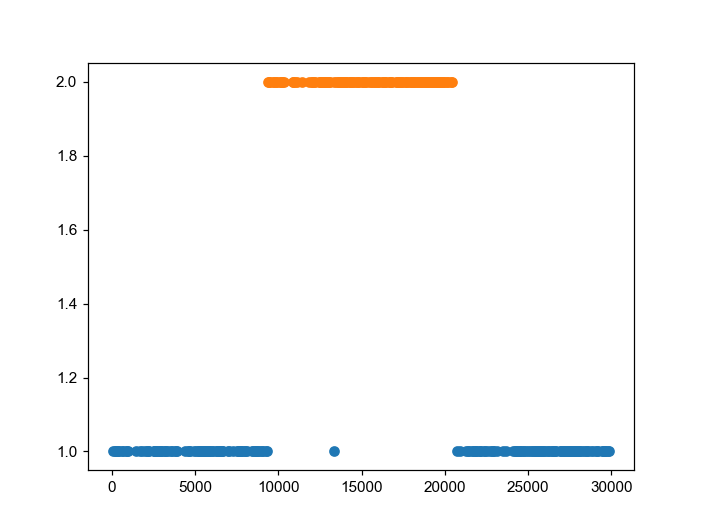

In [68]:
plt.figure()
plt.scatter([int(_info['pb_index']) 
             for _info in pb_dict['5'].kept_probes.values()],
         np.ones(len(pb_dict['5'].kept_probes)))
plt.scatter([int(_p) for _p in genome_name_2_pb_pos['5']], 
            2*np.ones(len(genome_name_2_pb_pos['5'])) )

In [69]:
# save this part of pb_dict
overwrite_pb_dict = True
genome_pb_dict_filename = os.path.join(report_folder, 'human_genome_pb_dict.pkl')
if os.path.exists(genome_pb_dict_filename) or overwrite_pb_dict:
    print(genome_pb_dict_filename)
    pickle.dump(pb_dict, open(genome_pb_dict_filename, 'wb'))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\reports\human_genome_pb_dict.pkl


# Part 2: Design controls for enhancer-promoter library

In [39]:
enhancer_library_folder = os.path.join(pool_folder, f'human_brain_promoter_enhancer_v2')
if not os.path.exists(enhancer_library_folder):
    print(f"create library folder: {enhancer_library_folder}")
    os.makedirs(enhancer_library_folder)
else:
    print(f"Use enhancer_library_folder: {enhancer_library_folder}")

Use enhancer_library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2


In [40]:
enhancer_filtered_records = []
with open(os.path.join(enhancer_library_folder, 
                       'filtered_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        enhancer_filtered_records.append(record)
print(len(enhancer_filtered_records))

391762


In [41]:
# get region size dict
min_num_probes = 50
enhancer_filtered_size_dic, len_check = check._check_region_size(
    enhancer_filtered_records, min_size=min_num_probes)
print(len_check)

gene: ABCA8 -> 161
gene: ABCA8-enhancer-374 -> 164
gene: ABCG2 -> 113
gene: ACSBG1 -> 231
gene: ACSS1 -> 326
gene: ACSS1-enhancer-410 -> 365
gene: ACSS1-enhancer-411 -> 240
gene: ACSS1-enhancer-412 -> 182
gene: ACSS1-enhancer-413 -> 250
gene: ACTA2 -> 239
gene: ADAM28 -> 152
gene: ADAM3A -> 111
gene: ADAMTS2 -> 346
gene: ADAMTS4 -> 281
gene: ADCY4 -> 317
gene: ADGRF5 -> 278
gene: ADRA1B -> 269
gene: AGT -> 247
gene: AGT-enhancer-27 -> 242
gene: AGT-enhancer-28 -> 214
gene: ALK -> 271
gene: ALK-enhancer-31 -> 236
gene: ALOX5AP -> 282
gene: ANK1 -> 289
gene: ANK1-enhancer-233 -> 223
gene: ANK1-enhancer-234 -> 293
gene: ANK1-enhancer-235 -> 238
gene: ANK1-enhancer-236 -> 328
gene: ANK1-enhancer-237 -> 153
gene: ANKFN1 -> 177
gene: ANO3 -> 173
gene: ANO4 -> 242
gene: APBB1IP -> 215
gene: AQP4 -> 257
gene: AQP4-enhancer-381 -> 226
gene: AQP4-enhancer-382 -> 178
gene: AQP4-enhancer-383 -> 296
gene: AQP4-enhancer-384 -> 152
gene: AQP4-enhancer-385 -> 202
gene: ARL4C -> 304
gene: ARPP19 -> 186

In [42]:
enhancer_blasted_records = []
with open(os.path.join(enhancer_library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        enhancer_blasted_records.append(record)
print(len(enhancer_blasted_records))

165445


In [43]:
# get region size dict
min_num_probes = 50
enhancer_blasted_size_dic, len_check = check._check_region_size(
    enhancer_blasted_records, min_size=min_num_probes)
print(len_check)

gene: ABCA8 -> 120
gene: ABCA8-enhancer-374 -> 120
gene: ABCG2 -> 101
gene: ACSBG1 -> 120
gene: ACSS1 -> 120
gene: ACSS1-enhancer-410 -> 120
gene: ACSS1-enhancer-411 -> 120
gene: ACSS1-enhancer-412 -> 120
gene: ACSS1-enhancer-413 -> 120
gene: ACTA2 -> 120
gene: ADAM28 -> 120
gene: ADAM3A -> 107
gene: ADAMTS2 -> 120
gene: ADAMTS4 -> 120
gene: ADCY4 -> 120
gene: ADGRF5 -> 120
gene: ADRA1B -> 120
gene: AGT -> 120
gene: AGT-enhancer-27 -> 120
gene: AGT-enhancer-28 -> 120
gene: ALK -> 120
gene: ALK-enhancer-31 -> 120
gene: ALOX5AP -> 120
gene: ANK1 -> 120
gene: ANK1-enhancer-233 -> 120
gene: ANK1-enhancer-234 -> 120
gene: ANK1-enhancer-235 -> 120
gene: ANK1-enhancer-236 -> 120
gene: ANK1-enhancer-237 -> 120
gene: ANKFN1 -> 120
gene: ANO3 -> 120
gene: ANO4 -> 120
gene: APBB1IP -> 120
gene: AQP4 -> 120
gene: AQP4-enhancer-381 -> 120
gene: AQP4-enhancer-382 -> 120
gene: AQP4-enhancer-383 -> 120
gene: AQP4-enhancer-384 -> 120
gene: AQP4-enhancer-385 -> 120
gene: ARL4C -> 120
gene: ARPP19 -> 120

### Load summary_region_info

In [44]:
enhancer_library_info_filename = os.path.join(enhancer_library_folder, r'summary_region_info.csv')

#if not os.path.exists(region_info_filename) or overwrite_region_info:
enhancer_info_df = pd.read_csv(enhancer_library_info_filename, )

enhancer_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,ABCA8,17:68942892-68967892,17,120,"['NDB_421_c', 'NDB_466_c', 'NDB_618_c']",gene,33
1,ABCA8-enhancer-374,17:68783840-68805152,17,120,"['NDB_396_c', 'NDB_459_c', 'NDB_511_c']",enhancer,32
2,ABCG2,4:88219128-88244128,4,101,"['NDB_456_c', 'NDB_459_c', 'NDB_519_c']",gene,39
3,ACSBG1,15:78233188-78258188,15,120,"['NDB_625_c', 'NDB_433_c', 'NDB_614_c']",gene,22
4,ACSS1,20:25046480-25071480,20,120,"['NDB_445_c', 'NDB_508_c', 'NDB_397_c']",gene,18
...,...,...,...,...,...,...,...
1383,hSE-93,2:172667041-172743591,2,120,"['NDB_379_c', 'NDB_371_c', 'NDB_630_c']",SE,70
1384,hSE-94,2:216004762-216045454,2,120,"['NDB_539_c', 'NDB_517_c', 'NDB_581_c']",SE,82
1385,hSE-96,2:219261532-219299142,2,120,"['NDB_396_c', 'NDB_372_c', 'NDB_461_c']",SE,84
1386,hSE-98,2:219642387-219690095,2,120,"['NDB_600_c', 'NDB_453_c', 'NDB_513_c']",SE,86


In [71]:
enhancer_name_2_chr = {str(_n):str(_c) 
                     for _n,_c in zip(enhancer_info_df['gene_name'], 
                                      enhancer_info_df['chr'])}

In [72]:
enhancer_chr_2_regions = {}
for _r, _chr in enhancer_name_2_chr.items():
    if _chr not in enhancer_chr_2_regions:
        enhancer_chr_2_regions[_chr] = [_r]
    else:
        enhancer_chr_2_regions[_chr].append(_r)

In [110]:
enhancer_chr_2_regions['21']

['CHODL',
 'COL6A2',
 'GRIK1',
 'GRIK1-enhancer-415',
 'GRIK1-enhancer-416',
 'GRIK1-enhancer-417',
 'GRIK1-enhancer-418',
 'GRIK1-enhancer-419',
 'OLIG1',
 'OLIG1-enhancer-420',
 'OLIG1-enhancer-421',
 'OLIG1-enhancer-422',
 'SAMSN1',
 'hSE-547',
 'hSE-548',
 'hSE-549',
 'hSE-550']

### Load encoding

In [73]:
enhancer_region_2_bits_filename = os.path.join(enhancer_library_folder, 
                                      'region_2_readout.pkl', )
enhancer_region_2_bits = pickle.load(open(enhancer_region_2_bits_filename, 'rb'))
try:
    enhancer_region_2_bits = {
        _k.replace('_enhancer','-enhancer'):np.array([int(_b.split('c')[1]) for _b in _v])
        for _k,_v in enhancer_region_2_bits.items()
    }
except:
    enhancer_region_2_bits = {
    str(_k):np.array([int(_b.split('c')[1]) for _b in _v])
    for _k,_v in enhancer_region_2_bits.items()
    }
    
# select regions:
orignial_size_th = 280
blast_size_th = 120

valid_region_names = []
valid_region_chrs = []
for _region_name, _blast_size in enhancer_blasted_size_dic.items():
    _size = enhancer_filtered_size_dic[_region_name]
    #print(_region_name, _blast_size - _size)
    if _size >= orignial_size_th and _blast_size >= blast_size_th:
        valid_region_names.append(_region_name)
        valid_region_chrs.append(enhancer_name_2_chr[_region_name])
        #print(_region_name, region_name_2_chr[_region_name])
    
all_bits = np.unique(np.array(list(enhancer_region_2_bits.values())))
num_bits = len(all_bits)

In [74]:
# select the rest from other chrs
selected_bit_usage = np.zeros(num_bits)
selected_region_chrs = []
# selected_region_names do not update this part

for _chr in np.unique(enhancer_info_df['chr']):
    if _chr in selected_region_chrs:
        continue
    # select one bit
    _chr_reg_names = np.array(valid_region_names)[np.array(valid_region_chrs)==_chr]
    if len(_chr_reg_names) > 0:
        _reg_bit_uses = [selected_bit_usage[enhancer_region_2_bits[_n]].max() for _n in _chr_reg_names]
        _sel_name = _chr_reg_names[np.argmin(_reg_bit_uses)]
        selected_region_names.append(_sel_name)
        selected_region_chrs.append(_chr)
        selected_bit_usage[enhancer_region_2_bits[_sel_name]] += 1
        print(_chr, _sel_name)
# select everything from chr21:
for _region in enhancer_chr_2_regions[sel_chr]:
    if _region not in selected_region_names:
        selected_region_names.append(_region)
        selected_region_chrs.append(enhancer_name_2_chr[_region])
        
print(len(selected_region_names))

1 ADAMTS4
10 C10orf90,DOCK1-enhancer-302
11 BARX2-enhancer-321
12 BTBD11-enhancer-335
13 ALOX5AP
14 ADCY4
15 hSE-427
16 CALB2
17 GFAP
18 L3MBTL4-enhancer-378
19 C3
2 ASIC4
20 ACSS1
21 hSE-547
22 WNT7B
3 hSE-103
4 hSE-149
5 ADAMTS2
6 FOXC1
7 DLX6-AS1
8 hSE-270
9 LHX6-enhancer-270
X IL1RAPL2-enhancer-427
97


In [112]:
enhancer_name_2_chr['LHX6-enhancer-270']

'9'

## Load the original probe designer

In [75]:
from ImageAnalysis3 import library_tools

In [76]:
enhancer_probe_filename = os.path.join(enhancer_library_folder, 'reports', r'merged_probes.pbr')

print(enhancer_probe_filename)
# Parse segemented list
_enhancer_pbde = library_tools.design.pb_reports_class()
_enhancer_pbde.load_from_file(enhancer_probe_filename)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\reports\merged_probes.pbr
- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\reports\merged_probes.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 464551 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file


True

In [77]:
# from blasted probes, generate enhancer_name_2_pb_pos
enhancer_name_2_pb_pos = {}
for _r in enhancer_blasted_records:
    _reg_name = _r.id.split('gene_')[1].split('_')[0]
    if _reg_name not in selected_region_names:
        continue
    _pb_id = _r.id.split('pos_')[1].split('_')[0]
    if _reg_name not in enhancer_name_2_pb_pos:
        enhancer_name_2_pb_pos[_reg_name] = []
    # append
    enhancer_name_2_pb_pos[_reg_name].append(_pb_id)
print(len(enhancer_name_2_pb_pos))

39


In [106]:
enhancer_name_2_pb_pos.keys()

dict_keys(['ACSS1', 'ADAMTS2', 'ADAMTS4', 'ADCY4', 'ALOX5AP', 'ASIC4', 'BARX2-enhancer-321', 'BTBD11-enhancer-335', 'C10orf90,DOCK1-enhancer-302', 'C3', 'CALB2', 'CHODL', 'COL6A2', 'DLX6-AS1', 'FOXC1', 'GFAP', 'GRIK1', 'GRIK1-enhancer-415', 'GRIK1-enhancer-416', 'GRIK1-enhancer-417', 'GRIK1-enhancer-418', 'GRIK1-enhancer-419', 'IL1RAPL2-enhancer-427', 'L3MBTL4-enhancer-378', 'LHX6-enhancer-270', 'OLIG1', 'OLIG1-enhancer-420', 'OLIG1-enhancer-421', 'OLIG1-enhancer-422', 'SAMSN1', 'WNT7B', 'hSE-103', 'hSE-149', 'hSE-270', 'hSE-427', 'hSE-547', 'hSE-548', 'hSE-549', 'hSE-550'])

In [78]:
for _s, _dict in _enhancer_pbde.kept_probes.items():
    if '_enhancer' in _dict['name']:
        _dict['name'] = _dict['name'].replace('_enhancer','-enhancer')
        _dict['reg_name'] = _dict['reg_name'].replace('_enhancer','-enhancer')
    _rname = _dict['name'].split('gene_')[1].split('_')[0]

    if _rname not in selected_region_names:
        continue
    else:
        #print(_rname)
        if _rname not in pb_dict:
            pb_dict[_rname] = library_tools.design.pb_reports_class()
        # skip
        if str(_dict['pb_index']) in enhancer_name_2_pb_pos[_rname]:
            continue
        # append if this probe hasn't been selected
        # change region id
        _rid = selected_region_names.index(_rname)
        _info_dict = {_k:_v for _k,_v in _dict.items()}
        _info_dict['reg_index'] = _rid
        _info_dict['reg_name'] = _info_dict['reg_name'].split('reg_')[0] + f"_reg_{_rid}"
        _info_dict['name'] = _info_dict['reg_name'] + f"_pb_{_info_dict['pb_index']}"
        pb_dict[_rname].kept_probes[_s] = _info_dict
    #break
print(len(pb_dict))

97


In [80]:
for _rn, _pbde in pb_dict.items():
    print(_rn, len(_pbde.kept_probes), list(_pbde.kept_probes.values())[0]['name'])

5 183 1:13735001-13765000_strand_+_gene_5_reg_0_pb_54
6 180 1:16235001-16265000_strand_+_gene_6_reg_1_pb_26
7 221 1:18735001-18765000_strand_+_gene_7_reg_2_pb_9
8 203 1:21235001-21265000_strand_+_gene_8_reg_3_pb_215
13 221 1:33735001-33765000_strand_+_gene_13_reg_4_pb_41
15 223 1:38735001-38765000_strand_+_gene_15_reg_5_pb_544
107 185 2:21235001-21265000_strand_+_gene_107_reg_16_pb_3
221 136 3:66235001-66265000_strand_+_gene_221_reg_20_pb_18
290 133 4:41235001-41265000_strand_+_gene_290_reg_21_pb_47
382 198 5:81235001-81265000_strand_+_gene_382_reg_22_pb_51
422 178 6:1235001-1265000_strand_+_gene_422_reg_23_pb_243
494 173 7:11235001-11265000_strand_+_gene_494_reg_24_pb_9
557 153 8:11235001-11265000_strand_+_gene_557_reg_25_pb_267
611 182 9:985001-1015000_strand_+_gene_611_reg_26_pb_104
680 174 10:985001-1015000_strand_+_gene_680_reg_6_pb_27
748 134 11:4985001-5015000_strand_+_gene_748_reg_7_pb_87
822 137 12:18985001-19015000_strand_+_gene_822_reg_8_pb_870
889 159 13:20985001-21015000_s

In [81]:
# save this part of pb_dict
overwrite_pb_dict = True
merged_pb_dict_filename = os.path.join(report_folder, 'human_genome-enhancer_pb_dict.pkl')
if os.path.exists(merged_pb_dict_filename) or overwrite_pb_dict:
    print(merged_pb_dict_filename)
    pickle.dump(pb_dict, open(merged_pb_dict_filename, 'wb'))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\reports\human_genome-enhancer_pb_dict.pkl


## No filtering is required. Directly go to assembly

<a id='3'></a>
# 3. Load and asssemble probes

<a id='3.1'></a>
## 3.1 design readout mapping dict (region_to_readout)

This part is a simple 2 color sequential

In [82]:
region_2_readout_dict = {}
for _i, _reg in enumerate(pb_dict):
    region_2_readout_dict[_reg] = [f"u{_i}", f"u{_i+len(pb_dict)}"]
print(region_2_readout_dict)

{'5': ['u0', 'u97'], '6': ['u1', 'u98'], '7': ['u2', 'u99'], '8': ['u3', 'u100'], '13': ['u4', 'u101'], '15': ['u5', 'u102'], '107': ['u6', 'u103'], '221': ['u7', 'u104'], '290': ['u8', 'u105'], '382': ['u9', 'u106'], '422': ['u10', 'u107'], '494': ['u11', 'u108'], '557': ['u12', 'u109'], '611': ['u13', 'u110'], '680': ['u14', 'u111'], '748': ['u15', 'u112'], '822': ['u16', 'u113'], '889': ['u17', 'u114'], '1002': ['u18', 'u115'], '1041': ['u19', 'u116'], '1074': ['u20', 'u117'], '1139': ['u21', 'u118'], '1225': ['u22', 'u119'], '1276': ['u23', 'u120'], '1300': ['u24', 'u121'], '1378': ['u25', 'u122'], '1379': ['u26', 'u123'], '1380': ['u27', 'u124'], '1381': ['u28', 'u125'], '1382': ['u29', 'u126'], '1383': ['u30', 'u127'], '1384': ['u31', 'u128'], '1385': ['u32', 'u129'], '1386': ['u33', 'u130'], '1387': ['u34', 'u131'], '1388': ['u35', 'u132'], '1389': ['u36', 'u133'], '1390': ['u37', 'u134'], '1391': ['u38', 'u135'], '1392': ['u39', 'u136'], '1393': ['u40', 'u137'], '1394': ['u41',

<a id='3.2'></a>
## 3.2 loading components

### primers
pick primer set 10,17

In [83]:
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([10,17], _primer_folder=primer_folder)

- Picked primer: ID: W1A11_primer_10
Name: W1A11_primer_10
Description: W1A11_primer_10
Number of features: 0
Seq('TTGCTAGCGTGGGCCAATCG')
- Picked primer: ID: W1B06_primer_17
Name: W1B06_primer_17
Description: W1B06_primer_17
Number of features: 0
Seq('TAATACGACTCACTATAGGGCCTGTGCGGAAATCGCGAGA')


## Load readouts

In [84]:
# collect types from region_2_readout_dict
readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}

### Readout usage, use STV to be orthogonal to the rest

In [89]:
from ImageAnalysis3.classes import _allowed_kwds

readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts'


# unique
readout_type = 'unique'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 0
_num_color = 3

readout_dict[_type_char] = library_tools.assemble.load_readouts(readout_usage_dict[_type_char], 
                                                       _type='designed_readouts', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=_num_color, # 750,647,561
                                                       _start_id=_readout_start,
                                                       )

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\designed_readouts_750.fasta 453 0 65
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\designed_readouts_647.fasta 453 0 65
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\designed_readouts_561.fasta 452 0 65
[65, 65, 65]


In [90]:
readout_dict

{'u': [SeqRecord(seq=Seq('ACAAATCCGACCAGATCGGACGATCATGGG'), id='Stv_3', name='Stv_3', description='Stv_3 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AGACGACGCACGTTCGTACCGCGTACTTCG'), id='Stv_32', name='Stv_32', description='Stv_32 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('TTCCCGCCAATGACGTCGGTTTGGACGAGA'), id='Stv_91', name='Stv_91', description='Stv_91 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('CAAGTATGCAGCGCGATTGACCGTCTCGTT'), id='Stv_4', name='Stv_4', description='Stv_4 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('TTTGCTCGCAAGTGCGCACGAGTTGAACTG'), id='Stv_33', name='Stv_33', description='Stv_33 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('GCGTTGATGTCCCTTGTGAGCGCCCGACAT'), id='Stv_92', name='Stv_92', description='Stv_92 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AAGTCGTACGCCGATGCGCAGCAATTCACT'), id='Stv_5', name='Stv_5', description='Stv_5 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AGTTTCCATACGCGGCGTGAATATCGCGGC'), id='Stv_35', name='Stv_35', description

In [91]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print(f'save to file: {readout_usage_file}')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\readout_usage.pkl


<a id='3.3'></a>
## 3.3 assemble probes

In [92]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}


In [93]:
# run assembly
cand_probes, readout_summary = Assemble_probes(library_folder, pb_dict, 
                                               region_2_readout_dict, readout_dict, primers, 
                                               primer_len=assemble_params['primer_len'], 
                                               num_readout_per_probe=assemble_params['num_readout_per_probe'], 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 183 probes in region: 5
--- assemblying 180 probes in region: 6
--- assemblying 221 probes in region: 7
--- assemblying 203 probes in region: 8
--- assemblying 221 probes in region: 13
--- assemblying 223 probes in region: 15
--- assemblying 185 probes in region: 107
--- assemblying 136 probes in region: 221
--- assemblying 133 probes in region: 290
--- assemblying 198 probes in region: 382
--- assemblying 178 probes in region: 422
--- assemblying 173 probes in region: 494
--- assemblying 153 probes in region: 557
--- assemblying 182 probes in region: 611
--- assemblying 174 probes in region: 680
--- assemblying 134 probes in region: 748
--- assemblying 137 probes in region: 822
--- assemblying 159 probes in region: 889
--- assemblying 261 probes in region: 1002
--- assemblying 134 probes in region: 1041
--- assemblying 153 probes in region: 1074
--- assemblying 136 probe

# 4.Check quality


## 4.1 Load probes

Checking procedures could restart from here

In [94]:
# folder for this library
# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 16321


### Manually input the following info to double check!

In [95]:
from ImageAnalysis3 import library_tools

num_readout_per_probe = 4
primer_len=20
target_len=42
min_num_probes = 40
# merfish related
num_on_bits = 2 ### Manually input the following info to double check!

primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([10,17], _primer_folder=primer_folder)

- Picked primer: ID: W1A11_primer_10
Name: W1A11_primer_10
Description: W1A11_primer_10
Number of features: 0
Seq('TTGCTAGCGTGGGCCAATCG')
- Picked primer: ID: W1B06_primer_17
Name: W1B06_primer_17
Description: W1B06_primer_17
Number of features: 0
Seq('TAATACGACTCACTATAGGGCCTGTGCGGAAATCGCGAGA')


### 4.1.1 check primer usage

In [96]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 16321
True


### 4.1.2 check region probe number

In [97]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: 5 -> 183
gene: 6 -> 180
gene: 7 -> 221
gene: 8 -> 203
gene: 13 -> 221
gene: 15 -> 223
gene: 107 -> 185
gene: 221 -> 136
gene: 290 -> 133
gene: 382 -> 198
gene: 422 -> 178
gene: 494 -> 173
gene: 557 -> 153
gene: 611 -> 182
gene: 680 -> 174
gene: 748 -> 134
gene: 822 -> 137
gene: 889 -> 159
gene: 1002 -> 261
gene: 1041 -> 134
gene: 1074 -> 153
gene: 1139 -> 136
gene: 1225 -> 162
gene: 1276 -> 124
gene: 1300 -> 146
gene: 1378 -> 97
gene: 1379 -> 172
gene: 1380 -> 72
gene: 1381 -> 94
gene: 1382 -> 90
gene: 1383 -> 110
gene: 1384 -> 28
gene: 1385 -> 43
gene: 1386 -> 11
gene: 1387 -> 70
gene: 1388 -> 56
gene: 1389 -> 131
gene: 1390 -> 168
gene: 1391 -> 113
gene: 1392 -> 124
gene: 1393 -> 203
gene: 1394 -> 54
gene: 1395 -> 162
gene: 1396 -> 72
gene: 1398 -> 64
gene: 1399 -> 148
gene: 1400 -> 188
gene: 1401 -> 148
gene: 1402 -> 188
gene: 1403 -> 103
gene: 1404 -> 115
gene: 1405 -> 216
gene: 1406 -> 208
gene: 1408 -> 234
gene: 1409 -> 254
gene: 1454 -> 157
gene: 1463 -> 148
gene: 1541 -> 

### 4.1.3 check readout usage for each gene

In [116]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_on_bits)
print(reg2readout_check)

5 -> ['Stv_3', 'NDB_23']
6 -> ['Stv_32', 'NDB_24']
7 -> ['Stv_91', 'NDB_25']
8 -> ['Stv_4', 'NDB_26']
13 -> ['Stv_33', 'NDB_27']
15 -> ['Stv_92', 'NDB_28']
107 -> ['Stv_5', 'NDB_29']
221 -> ['Stv_35', 'NDB_30']
290 -> ['Stv_94', 'NDB_31']
382 -> ['Stv_6', 'NDB_32']
422 -> ['Stv_36', 'NDB_33']
494 -> ['Stv_95', 'NDB_34']
557 -> ['Stv_7', 'NDB_35']
611 -> ['Stv_37', 'NDB_36']
680 -> ['Stv_99', 'NDB_37']
748 -> ['Stv_8', 'NDB_38']
822 -> ['Stv_39', 'NDB_39']
889 -> ['Stv_100', 'NDB_40']
1002 -> ['Stv_9', 'NDB_41']
1041 -> ['Stv_40', 'NDB_42']
1074 -> ['Stv_101', 'NDB_43']
1139 -> ['Stv_10', 'NDB_44']
1225 -> ['Stv_42', 'NDB_45']
1276 -> ['Stv_104', 'NDB_46']
1300 -> ['Stv_11', 'NDB_47']
1378 -> ['Stv_44', 'NDB_48']
1379 -> ['Stv_105', 'NDB_49']
1380 -> ['Stv_12', 'NDB_50']
1381 -> ['Stv_45', 'NDB_51']
1382 -> ['Stv_106', 'NDB_52']
1383 -> ['Stv_13', 'NDB_53']
1384 -> ['Stv_46', 'NDB_54']
1385 -> ['Stv_107', 'NDB_55']
1386 -> ['Stv_14', 'NDB_56']
1387 -> ['Stv_48', 'NDB_57']
1388 -> ['Stv_

### 4.1.4 check readout usage in the library

In [118]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)
print(readout2reg_check)

-- extracting probes from >region:5, region:6, region:7, region:8, region:13, region:15, region:107, region:221, region:290, region:382, region:422, region:494, region:557, region:611, region:680, region:748, region:822, region:889, region:1002, region:1041, region:1074, region:1139, region:1225, region:1276, region:1300, region:1378, region:1379, region:1380, region:1381, region:1382, region:1383, region:1384, region:1385, region:1386, region:1387, region:1388, region:1389, region:1390, region:1391, region:1392, region:1393, region:1394, region:1395, region:1396, region:1398, region:1399, region:1400, region:1401, region:1402, region:1403, region:1404, region:1405, region:1406, region:1408, region:1409, region:1454, region:1463, region:1541, region:GFAP, region:ACSS1, region:ADCY4, region:FOXC1, region:CALB2, region:ASIC4, region:GRIK1, region:DLX6-AS1, region:C3, region:SAMSN1, region:ALOX5AP, region:ADAMTS4, region:OLIG1, region:COL6A2, region:ADAMTS2, region:CHODL, region:WNT7B, re

### 4.1.5 check bewteen probes

In [119]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [120]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [121]:
# check between probes
int_kept_records, removed_count = check._check_between_probes(
    full_records, int_map, 
    primer_len=primer_len, 
    target_len=target_len)

--- Sequence:loc_6:1235001-1265000_gene_422_reg_23_pb_124_pos_25980_strand_+_readouts_[Stv_36_u,Stv_36_u,Stv_36_u,Stv_36_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:62, dumped
--- Sequence:loc_6:1235001-1265000_gene_422_reg_23_pb_125_pos_26025_strand_+_readouts_[NDB_33_u,NDB_33_u,NDB_33_u,NDB_33_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:53, dumped
--- Sequence:loc_10:985001-1015000_gene_680_reg_6_pb_134_pos_26107_strand_-_readouts_[Stv_99_u,Stv_99_u,Stv_99_u,Stv_99_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:56, dumped
--- Sequence:loc_16:735001-765000_gene_1074_reg_12_pb_65_pos_11145_strand_+_readouts_[NDB_43_u,NDB_43_u,NDB_43_u,NDB_43_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:69, dumped
--- Sequence:loc_16:735001-765000_gene_1074_reg_12_pb_67_pos_11363_strand_+_readouts_[NDB_43_u,NDB_43_u,NDB_43_u,NDB_43_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:55, dumped
--- Sequence:loc_16:735001-765000_gene_1074_reg_12_pb_68_pos_11450_strand

--- Sequence:loc_21:45104328-45161413_gene_hSE-550_reg_96_pb_321_pos_29489_strand_+_readouts_[NDB_119_u,NDB_119_u,NDB_119_u,NDB_119_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:119, dumped
--- Sequence:loc_21:45104328-45161413_gene_hSE-550_reg_96_pb_322_pos_29608_strand_+_readouts_[NDB_22_u,NDB_22_u,NDB_22_u,NDB_22_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:131, dumped
--- Sequence:loc_21:45104328-45161413_gene_hSE-550_reg_96_pb_323_pos_29764_strand_-_readouts_[NDB_119_u,NDB_119_u,NDB_119_u,NDB_119_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:123, dumped
--- Sequence:loc_21:45104328-45161413_gene_hSE-550_reg_96_pb_324_pos_29835_strand_+_readouts_[NDB_22_u,NDB_22_u,NDB_22_u,NDB_22_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:54, dumped
--- Sequence:loc_21:45104328-45161413_gene_hSE-550_reg_96_pb_325_pos_29893_strand_-_readouts_[NDB_119_u,NDB_119_u,NDB_119_u,NDB_119_u]_primers_[W1A11_primer_10,W1B06_primer_17] got hits:93, dumped
--- Sequence:loc_21:

In [122]:
# clear memory
del(int_map)

### 4.1.6 Check against previous counttable

In [123]:
ctp14_human_full_table_file = os.path.join(reference_folder, 'ctp14-human_full_17w.npy')
# load
ct = library_tools.design.countTable(
        word=17,save_file=ctp14_human_full_table_file, 
        sparse=False)
# load 
ct.load()

In [124]:
# check between probes
kept_records, removed_count = check._check_between_probes(
    int_kept_records, ct, 
    primer_len=primer_len, 
    target_len=target_len)

-- total probes removed by internal screening: 0


### 4.1.7 finish checking, save

In [125]:
print(len(kept_records), len(cand_probes))

16254 16321


In [126]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

### could restart from here

In [127]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

<module 'ImageAnalysis3.library_tools.quality_check' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\quality_check.py'>

In [128]:
if 'kept_records' not in locals() or len(kept_records) == 0:
    kept_records = []
    with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            kept_records.append(record)
print(len(kept_records))

16254


In [129]:
blast_database = os.path.join(reference_folder, 'blast_database', 'hg38')

check.Blast_probes(kept_records, library_folder, num_threads=66, 
                   blast_db=blast_database, blast_evalue=100, overwrite=False)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\blast_database\hg38
-- number of probes loaded: 16254
-- processing region: 1002 with 261 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_1002.fasta
--- *blasting region: 1002
--- total time for blast 1002: 17.934s.
-- processing region: 1041 with 134 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_1041.fasta
--- *blasting region: 1041
--- total time for blast 1041: 9.587s.
-- processing region: 107 with 185 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_107.fasta
--- *blasting region: 107
--- total time for blast 107: 10.124s.
-- processing region: 1074 with 147 probes
--- *writing file: \\10.245.74.212\Chromatin_NA

--- total time for blast 1403: 4.925s.
-- processing region: 1404 with 115 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_1404.fasta
--- *blasting region: 1404
--- total time for blast 1404: 7.589s.
-- processing region: 1405 with 216 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_1405.fasta
--- *blasting region: 1405
--- total time for blast 1405: 11.829s.
-- processing region: 1406 with 208 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_1406.fasta
--- *blasting region: 1406
--- total time for blast 1406: 10.279s.
-- processing region: 1408 with 206 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_1408.fasta
--- *

--- total time for blast OLIG1-enhancer-421: 7.209s.
-- processing region: OLIG1-enhancer-422 with 87 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_OLIG1-enhancer-422.fasta
--- *blasting region: OLIG1-enhancer-422
--- total time for blast OLIG1-enhancer-422: 5.482s.
-- processing region: SAMSN1 with 6 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\blast\probe_gene_SAMSN1.fasta
--- *blasting region: SAMSN1
--- total time for blast SAMSN1: 5.939s.
-- processing region: WNT7B with 195 probes
-- processing region: hSE-103 with 489 probes
-- processing region: hSE-149 with 306 probes
-- processing region: hSE-270 with 180 probes
-- processing region: hSE-427 with 226 probes
-- processing region: hSE-547 with 271 probes
-- processing region: hSE-548 with 593 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chrom

### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [130]:
# screen
target_len = 42
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 80
kept_pbs, blast_keep_dic, hc_list, sc_list = check.Screening_Probes_by_Blast(
    library_folder, 
    num_probes_per_region,
    keep_mode='front',
    hard_thres=target_len,
    soft_count_th=50,
    )

- Number of probes loaded: 16254
- Number of regions in this library: 97
-- checking probes in region: 5
--- gene=5, id=6 removed by soft count = 65
--- gene=5, id=67 removed by soft count = 153
--- gene=5, id=90 removed by soft count = 71
--- number of probes: 183 , kept by blast: 180 , if remove dups: 180
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: 6
--- gene=6, id=53 removed by soft count = 125
--- gene=6, id=85 removed by soft count = 201
--- number of probes: 180 , kept by blast: 178 , if remove dups: 178
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: 7
--- gene=7, id=104 removed by soft count = 218
--- gene=7, id=126 removed by hard count = 0
--- gene=7, id=129 removed by soft count = 71
--- gene=7, id=133 removed by soft count = 256
--- gene=7, id=159 removed by soft count = 85
--- number of probes: 221 , k

--- gene=1041, id=113 removed by soft count = 72
--- number of probes: 134 , kept by blast: 130 , if remove dups: 130
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: 1074
--- gene=1074, id=66 removed by soft count = 170
--- gene=1074, id=67 removed by soft count = 97
--- gene=1074, id=68 removed by soft count = 122
--- gene=1074, id=69 removed by soft count = 82
--- gene=1074, id=70 removed by soft count = 65
--- number of probes: 147 , kept by blast: 142 , if remove dups: 141
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: 1139
--- gene=1139, id=71 removed by soft count = 304
--- gene=1139, id=89 removed by soft count = 366
--- gene=1139, id=97 removed by soft count = 98
--- number of probes: 136 , kept by blast: 133 , if remove dups: 133
--- remove duplicated probes
--- keep probes in the front
-- number of probes ke

E:\Users\puzheng_new\Documents\Chromatin_Analysis_Scripts\Library_design\CTP-14-human_brain_genome\..\..\..\..\Documents\ImageAnalysis3\library_tools\quality_check.py:578: RuntimeWarning: invalid value encountered in true_divide
  if sum(_keep_dic[_reg] * (_hard_cts == 1)) / float(sum(_keep_dic[_reg])) >= smallest_region_ratio and sum(_keep_dic[_reg]) >= smallest_region_ratio*probe_per_region:


--- gene=1387, id=16 removed by soft count = 106
--- gene=1387, id=36 removed by soft count = 847
--- gene=1387, id=37 removed by soft count = 73
--- gene=1387, id=38 removed by soft count = 185
--- gene=1387, id=39 removed by soft count = 264
--- gene=1387, id=40 removed by soft count = 665
--- number of probes: 70 , kept by blast: 64 , if remove dups: 64
--- remove duplicated probes
-- number of probes kept for this region: 64
-- checking probes in region: 1388
--- gene=1388, id=21 removed by soft count = 2713
--- gene=1388, id=23 removed by soft count = 132
--- gene=1388, id=24 removed by soft count = 281
--- gene=1388, id=25 removed by soft count = 157
--- number of probes: 56 , kept by blast: 52 , if remove dups: 52
-- number of probes kept for this region: 52
-- checking probes in region: 1389
--- gene=1389, id=65 removed by soft count = 528
--- gene=1389, id=66 removed by soft count = 63
--- gene=1389, id=115 removed by soft count = 78
--- gene=1389, id=116 removed by soft count

--- gene=1405, id=206 removed by soft count = 163
--- gene=1405, id=209 removed by soft count = 69
--- gene=1405, id=211 removed by soft count = 336
--- gene=1405, id=214 removed by soft count = 248
--- number of probes: 216 , kept by blast: 194 , if remove dups: 194
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: 1406
--- gene=1406, id=51 removed by soft count = 172
--- gene=1406, id=73 removed by soft count = 51
--- gene=1406, id=74 removed by soft count = 172
--- gene=1406, id=115 removed by soft count = 59
--- gene=1406, id=138 removed by soft count = 162
--- gene=1406, id=139 removed by soft count = 87
--- gene=1406, id=141 removed by soft count = 288
--- gene=1406, id=167 removed by soft count = 125
--- number of probes: 208 , kept by blast: 200 , if remove dups: 200
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region

--- gene=COL6A2, id=54 removed by soft count = 452
--- gene=COL6A2, id=61 removed by soft count = 114
--- gene=COL6A2, id=67 removed by soft count = 51
--- gene=COL6A2, id=68 removed by soft count = 78
--- number of probes: 78 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
-- number of probes kept for this region: 68
-- checking probes in region: ADAMTS2
--- number of probes: 226 , kept by blast: 226 , if remove dups: 226
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: CHODL
--- gene=CHODL, id=4 removed by soft count = 718
--- gene=CHODL, id=5 removed by soft count = 622
--- gene=CHODL, id=8 removed by soft count = 117
--- gene=CHODL, id=9 removed by soft count = 270
--- gene=CHODL, id=10 removed by soft count = 67
--- gene=CHODL, id=11 removed by soft count = 623
--- gene=CHODL, id=13 removed by soft count = 60
--- number of probes: 21 , kept by blast: 14 , if remove dups: 14
--

--- gene=OLIG1-enhancer-422, id=24 removed by soft count = 446
--- gene=OLIG1-enhancer-422, id=36 removed by soft count = 1942
--- gene=OLIG1-enhancer-422, id=59 removed by soft count = 132
--- number of probes: 87 , kept by blast: 84 , if remove dups: 84
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: IL1RAPL2-enhancer-427
--- gene=IL1RAPL2-enhancer-427, id=25 removed by soft count = 8910
--- gene=IL1RAPL2-enhancer-427, id=77 removed by soft count = 54
--- number of probes: 179 , kept by blast: 177 , if remove dups: 177
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 80
-- checking probes in region: hSE-103
--- gene=hSE-103, id=24 removed by soft count = 123
--- gene=hSE-103, id=25 removed by soft count = 116
--- gene=hSE-103, id=116 removed by soft count = 125
--- gene=hSE-103, id=181 removed by soft count = 59
--- gene=hSE-103, id=183 removed by so

# 5. Summary Table and plots

In [131]:
blasted_records = []
with open(os.path.join(library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        blasted_records.append(record)
print(len(blasted_records))

7229


In [135]:
import re

region_info_dict = {
    'gene_name':[],
    'locus_info':[],
    'chr':[],
    #'chr_order':[],
    'num_probes':[],
    'readouts': [],
    #'type':[],
}

probe_name_re_string = r'loc_(?P<loc>.+)_gene_(?P<gene>.+)_pb_(?P<pb>[0-9]+)_pos_(?P<pos>[0-9]+)(.+)_readouts_\[(?P<readouts>.+?)\]_primers_\[(?P<fwd_primers>.+?),(?P<rev_primers>.+?)\]'

for _pb in blasted_records:
    
    _match = re.match(probe_name_re_string, _pb.id, )
    # append all if not exist
    if _match.groupdict()['gene'] not in region_info_dict['gene_name']:
        # append new
        region_info_dict['gene_name'].append(_match.groupdict()['gene'])
        region_info_dict['locus_info'].append(_match.groupdict()['loc'])
        region_info_dict['chr'].append(_match.groupdict()['loc'].split(':')[0])
        region_info_dict['num_probes'].append(1)
        region_info_dict['readouts'].append(list(np.unique(_match.groupdict()['readouts'].split(','))))
    else:
        _ind = region_info_dict['gene_name'].index(_match.groupdict()['gene'])
        region_info_dict['num_probes'][_ind] += 1
        for _rd in np.unique(_match.groupdict()['readouts'].split(',')):
            if _rd not in region_info_dict['readouts'][_ind]:
                region_info_dict['readouts'][_ind].append(_rd)
        
    #break

In [136]:
region_info_df = pd.DataFrame(region_info_dict)
region_info_df

,gene_name,locus_info,chr,num_probes,readouts
0,5_reg_0,1:13735001-13765000,1,80,"[Stv_3_u, NDB_23_u]"
1,6_reg_1,1:16235001-16265000,1,80,"[Stv_32_u, NDB_24_u]"
2,7_reg_2,1:18735001-18765000,1,80,"[Stv_91_u, NDB_25_u]"
3,8_reg_3,1:21235001-21265000,1,80,"[Stv_4_u, NDB_26_u]"
4,13_reg_4,1:33735001-33765000,1,80,"[Stv_33_u, NDB_27_u]"
...,...,...,...,...,...
90,hSE-427_reg_64,15:26696846-26730671,15,80,"[NDB_18_u, NDB_115_u]"
91,hSE-547_reg_71,21:26127925-26173760,21,80,"[NDB_19_u, NDB_116_u]"
92,hSE-548_reg_94,21:33008810-33064965,21,80,"[NDB_20_u, NDB_117_u]"
93,hSE-549_reg_95,21:33359387-33394726,21,80,"[NDB_21_u, NDB_118_u]"


In [132]:
# from blasted probes, generate genome_name_2_pb_pos
genome_name_2_pb_pos = {}
for _r in blasted_records:
    _reg_name = _r.id.split('gene_')[1].split('_')[0]
    if _reg_name not in selected_region_names:
        continue
    _pb_id = _r.id.split('pos_')[1].split('_')[0]
    if _reg_name not in genome_name_2_pb_pos:
        genome_name_2_pb_pos[_reg_name] = []
    # append
    genome_name_2_pb_pos[_reg_name].append(_pb_id)
print(len(genome_name_2_pb_pos))

95


<IPython.core.display.Javascript object>


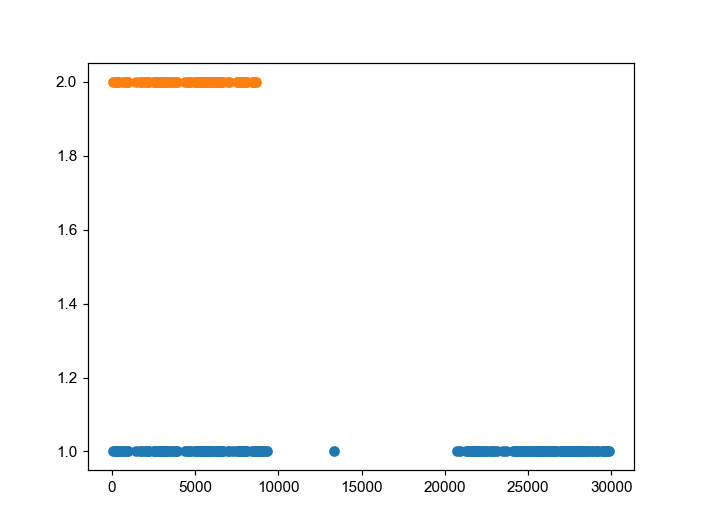

In [134]:
plt.figure()
plt.scatter([int(_info['pb_index']) 
             for _info in pb_dict['5'].kept_probes.values()],
         np.ones(len(pb_dict['5'].kept_probes)))
plt.scatter([int(_p) for _p in genome_name_2_pb_pos['5']], 
            2*np.ones(len(genome_name_2_pb_pos['5'])) )

In [137]:
# Add additional information
_types = []
for _g in region_info_df['gene_name']:
    if 'hSE-' in _g:
        _types.append('SE')
    elif 'enhancer-' in _g:
        _types.append('enhancer')
    else:
        try: 
            print(int(_g))
            _types.append('genome')
        except:
            _types.append('gene')
# add to this df
region_info_df['type'] = _types

region_info_df['chr_order'] = -1
for _chr in np.unique(region_info_df['chr']):
    _reg_starts = [int(_info.split(':')[1].split('-')[0])
                   for _info in region_info_df.loc[region_info_df['chr']==_chr,
                                                   'locus_info']
                  ]
    _reg_orders = np.array(_reg_starts).argsort().argsort().astype(np.int32)
    region_info_df.loc[region_info_df['chr']==_chr,'chr_order'] = _reg_orders

In [138]:
region_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,5_reg_0,1:13735001-13765000,1,80,"[Stv_3_u, NDB_23_u]",gene,0
1,6_reg_1,1:16235001-16265000,1,80,"[Stv_32_u, NDB_24_u]",gene,1
2,7_reg_2,1:18735001-18765000,1,80,"[Stv_91_u, NDB_25_u]",gene,2
3,8_reg_3,1:21235001-21265000,1,80,"[Stv_4_u, NDB_26_u]",gene,3
4,13_reg_4,1:33735001-33765000,1,80,"[Stv_33_u, NDB_27_u]",gene,4
...,...,...,...,...,...,...,...
90,hSE-427_reg_64,15:26696846-26730671,15,80,"[NDB_18_u, NDB_115_u]",SE,0
91,hSE-547_reg_71,21:26127925-26173760,21,80,"[NDB_19_u, NDB_116_u]",SE,12
92,hSE-548_reg_94,21:33008810-33064965,21,80,"[NDB_20_u, NDB_117_u]",SE,28
93,hSE-549_reg_95,21:33359387-33394726,21,80,"[NDB_21_u, NDB_118_u]",SE,31


In [139]:
overwrite_region_info = True
region_info_filename = os.path.join(library_folder, r'summary_region_info.csv')

if not os.path.exists(region_info_filename) or overwrite_region_info:
    print(f"saving region info to file: {region_info_filename}")
    region_info_df.to_csv(region_info_filename, index=False)

saving region info to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_sequential_validation\summary_region_info.csv


## Generate summary plots

In [140]:
import ImageAnalysis3.library_tools.quality_check as check
# get region size dict
min_num_probes = 50
reg_size_dic, len_check = check._check_region_size(blasted_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: 5 -> 80
gene: 6 -> 80
gene: 7 -> 80
gene: 8 -> 80
gene: 13 -> 80
gene: 15 -> 80
gene: 107 -> 80
gene: 221 -> 80
gene: 290 -> 80
gene: 382 -> 80
gene: 422 -> 80
gene: 494 -> 80
gene: 557 -> 80
gene: 611 -> 80
gene: 680 -> 80
gene: 748 -> 80
gene: 822 -> 80
gene: 889 -> 80
gene: 1002 -> 80
gene: 1041 -> 80
gene: 1074 -> 80
gene: 1139 -> 80
gene: 1225 -> 80
gene: 1276 -> 80
gene: 1300 -> 80
gene: 1378 -> 80
gene: 1379 -> 80
gene: 1380 -> 67
gene: 1381 -> 80
gene: 1382 -> 80
gene: 1383 -> 80
gene: 1384 -> 13
gene: 1385 -> 33
gene: 1387 -> 64
gene: 1388 -> 52
gene: 1389 -> 80
gene: 1390 -> 80
gene: 1391 -> 80
gene: 1392 -> 80
gene: 1393 -> 80
gene: 1394 -> 46
gene: 1395 -> 80
gene: 1396 -> 65
gene: 1398 -> 52
gene: 1399 -> 80
gene: 1400 -> 80
gene: 1401 -> 80
gene: 1402 -> 80
gene: 1403 -> 80
gene: 1404 -> 80
gene: 1405 -> 80
gene: 1406 -> 80
gene: 1408 -> 80
gene: 1409 -> 80
gene: 1454 -> 80
gene: 1463 -> 80
gene: 1541 -> 80
gene: GFAP -> 80
gene: ACSS1 -> 80
gene: ADCY4 -> 80
gene: 

## number of probes in each region

<IPython.core.display.Javascript object>


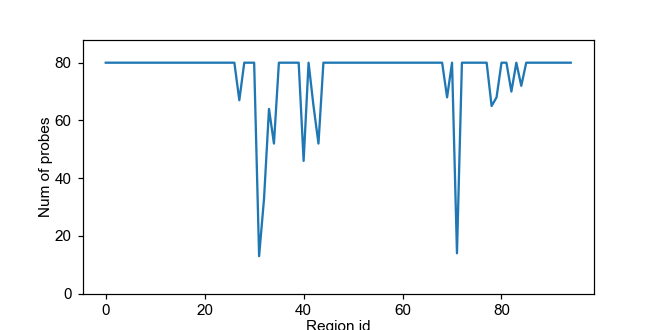

In [141]:
# Plot number of probes per region
plt.figure(figsize=(6,3), dpi=100)
plt.plot(list(reg_size_dic.values()))
## number and location on each chr#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"Num of probes", labelpad=1)
plt.xlabel(f"Region id", labelpad=1)
plt.ylim([0, np.max(list(reg_size_dic.values()))*1.1])
plt.savefig(os.path.join(report_folder, 'afterblast_nProbes_per_region.png'), transparent=True, dpi=300)
plt.show()

## number and location on each chr

In [142]:
chrs = []
chr_2_centers = {}
chr_2_types = {}
for _loc_name, _type in zip(region_info_df['locus_info'], region_info_df['type']):
    _chr = _loc_name.split(':')[0]
    _start, _end = _loc_name.split(':')[1].split('-')
    _center = (int(_start)+int(_end))/2
    if _chr not in chrs:
        chrs.append(_chr)
    # create
    if _chr not in chr_2_centers:
        chr_2_centers[_chr] = []
        chr_2_types[_chr] = []
    # append
    if _center not in chr_2_centers[_chr]:
        chr_2_centers[_chr].append(_center)
        chr_2_types[_chr].append(_type)
# region number
chr_2_region_num = {_chr:len(cts) for _chr, cts in chr_2_centers.items()}

In [143]:
# Load chromosome sizes
import pandas as pd
from ImageAnalysis3.structure_tools.distance import sort_chr

sorted_chrs = sorted(chrs, key=lambda _c: sort_chr(_c))

chrom_size_df = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\hg38.chrom.sizes',
            delimiter='\t', header=None)

chr_2_len = {}
for _chr in chrs:
    chr_2_len[_chr] = chrom_size_df.loc[chrom_size_df[0]==f'chr{_chr}', 1].values[0]


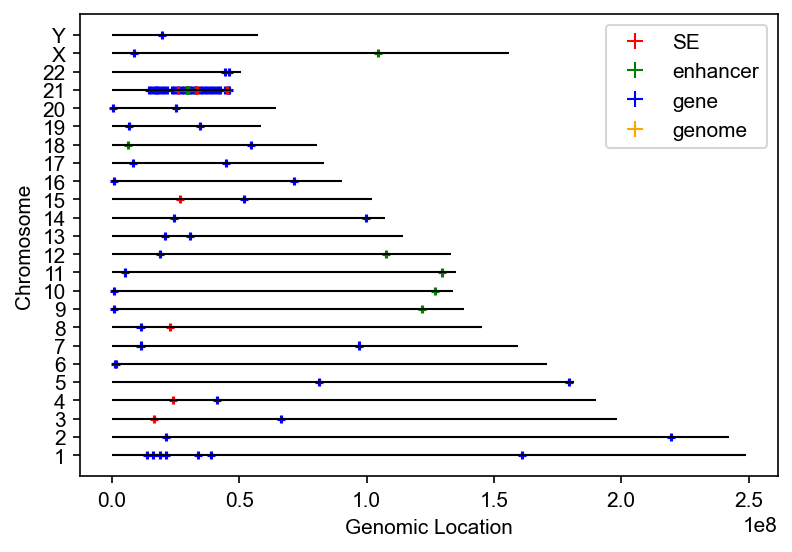

In [144]:
%matplotlib inline
color_map = {
    'SE':'red',
    'enhancer':'green',
    'gene':'blue',
    'genome': 'orange',
}
#plt.style.use('dark_background')
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(6,4),dpi=150)
for _i, _chr in enumerate(sorted_chrs):
    ax.hlines(_i, 0, chr_2_len[_chr], color='black', linewidth=1)
    ax.scatter(chr_2_centers[_chr], 
               np.ones(len(chr_2_centers[_chr]))* _i, 
               marker='+', linewidth=1.5,
               s=15, c=[color_map[_t] for _t in chr_2_types[_chr]],
               )
# create legend patch
legend_element = [Line2D([0],[0], color=[0,0,0,0], 
                         label=_type, marker='+', markersize=8,
                         markeredgecolor=_c, markerfacecolor=_c,)
                  for _type,_c in color_map.items()]
ax.legend(handles=legend_element)
ax.set_yticks(np.arange(len(sorted_chrs)))
ax.set_yticklabels(sorted_chrs)
#ax.set_xlim([0, chr_2_len['1']])
ax.set_xlabel("Genomic Location")
ax.set_ylabel("Chromosome")
#ax.legend([_sc])
plt.savefig(os.path.join(report_folder, 'target_location_summary.png'), 
            dpi=300, transparent=True)
plt.show()

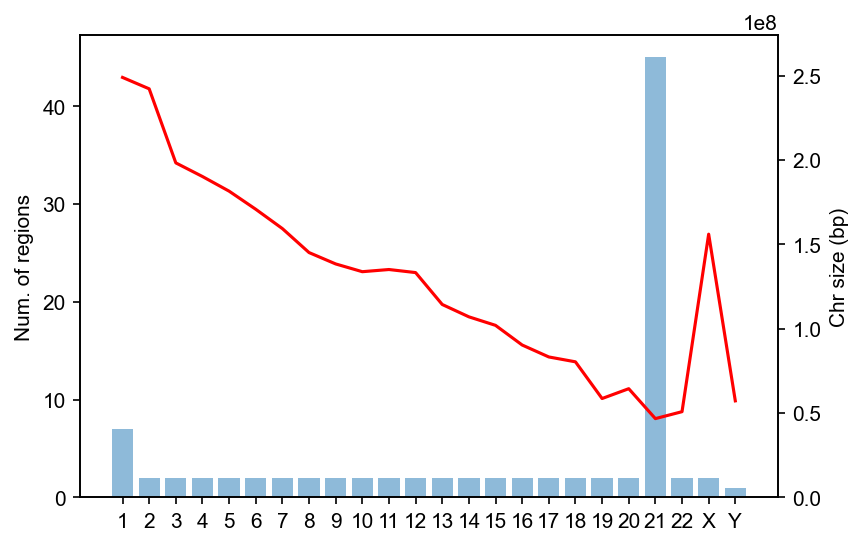

In [145]:
fig, ax1 = plt.subplots(figsize=(6,4),dpi=150)
ax2 = ax1.twinx()
_bar_p = ax1.bar(sorted_chrs, 
                 [chr_2_region_num[_c] for _c in sorted_chrs], alpha=0.5)
ax1.set_ylabel("Num. of regions")
ax2.plot(sorted_chrs, [chr_2_len[_c] for _c in sorted_chrs], color='r')
ax2.set_ylim([0, np.max(list(chr_2_len.values()))*1.1])
ax2.set_ylabel("Chr size (bp)")
plt.savefig(os.path.join(report_folder, 'target_chr_stat_summary.png'), 
            dpi=300, transparent=True)
plt.show()